# Seyed Mohammad Amin Atyabi - 830402014 - HW 3 (Part 4)

**شبکه تصادفی**

ابتدا گراف بدون جهتی میسازیم.

سپس 5242 گره به این گراف اضافه میکنیم.

در انتها به تعداد 14484 یال تصادفی به شبکه اضافه میکنیم. فرآیند اضافه کردن یال بدین صورت است که به تصادف دو گره از گراف را انتخاب کرده و میان آن ها یالی قرار میدهیم.

In [15]:
import snap

random_graph = snap.TUNGraph.New()

for v in range(5242):
    random_graph.AddNode(v)

while random_graph.GetEdges() < 14484:
    random_graph.AddEdge(random_graph.GetRndNId(), random_graph.GetRndNId())

random_graph.PrintInfo()

Graph:
  Nodes:                    5242
  Edges:                    14484
  Zero Deg Nodes:           32
  Zero InDeg Nodes:         32
  Zero OutDeg Nodes:        32
  NonZero In-Out Deg Nodes: 5210


**مدل جهان کوچک**

با استفاده از توابع موجود در پکیج اسنپ، یک شبکه جهان کوچک با 5242 گره میسازیم که هر گره با گره بعدی و گره بعد از آن یال دارد میسازیم.

حال تا زمانی که شبکه به 14484 یال برسد، به صورت تصادفی دو گره را انتخاب کرده و میان آن ها یال رسم میکنیم.

In [16]:
rnd = snap.TRnd(1,0)
sm_graph = snap.GenSmallWorld(5242, 2, 0, rnd)
while sm_graph.GetEdges() < 14484:
    sm_graph.AddEdge(sm_graph.GetRndNId(), sm_graph.GetRndNId())
sm_graph.PrintInfo()

Graph:
  Nodes:                    5242
  Edges:                    14484
  Zero Deg Nodes:           0
  Zero InDeg Nodes:         0
  Zero OutDeg Nodes:        0
  NonZero In-Out Deg Nodes: 5242


**شبکه دنیای واقعی**

فایل داده شده وارد برنامه میکنیم. سپس یال های طوقه آن را حذف میکنیم.

In [17]:
real_graph = snap.LoadEdgeList(snap.TUNGraph, "Data/CA-GrQc.txt", 0, 1)
real_graph.DelSelfEdges()
real_graph.PrintInfo()

Graph:
  Nodes:                    5242
  Edges:                    14484
  Zero Deg Nodes:           1
  Zero InDeg Nodes:         1
  Zero OutDeg Nodes:        1
  NonZero In-Out Deg Nodes: 5241


ابتدا توالی درجات شبکه را محاسبه میکنیم. سپس توالی درجات $k+1$ را بدست می آوریم.

حال توزیع درجات $k+1$ را محاسبه میکنیم. (تعداد گره هایی که دارای درجه $k$ هستند)

حال این تعداد را بر کل تقسیم کرده تا نرمالاز شود.

In [18]:
import numpy

def calculate_excess_degree_distribution(graph):
    degree_sequence = []
    for node in graph.Nodes():
        degree_sequence.append(node.GetDeg())

    excess_degree_sequence = numpy.array(degree_sequence) + 1
    excess_degree_counts = numpy.bincount(excess_degree_sequence)
    excess_degree_distribution = excess_degree_counts / numpy.sum(excess_degree_counts)

    return excess_degree_distribution

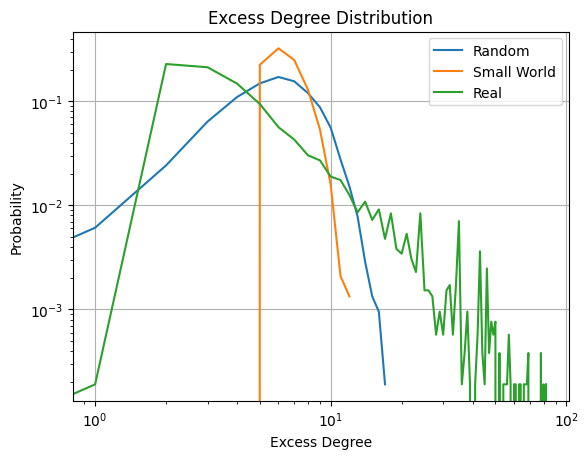

In [19]:
from matplotlib import pyplot as plt

excess_degree_distribution_random = calculate_excess_degree_distribution(random_graph)
excess_degree_distribution_sm = calculate_excess_degree_distribution(sm_graph)
excess_degree_distribution_real = calculate_excess_degree_distribution(real_graph)

plt.plot(excess_degree_distribution_random, label='Random')
plt.plot(excess_degree_distribution_sm, label='Small World')
plt.plot(excess_degree_distribution_real, label='Real')

plt.title('Excess Degree Distribution')
plt.xlabel('Excess Degree')
plt.ylabel('Probability')

plt.xscale('log')
plt.yscale('log')

plt.legend()
plt.grid()
plt.show()